# Example 3 - ODE for NAG

This notebook explores the relationship between **Nesterov's Accelerated Gradient (NAG)** and its continuous-time approximation using an **ODE-based system**. The ODE is derived from Su et al.'s paper:

> Su, W., Boyd, S., & Candes, E. J. (2016). A Differential Equation for Modeling Nesterov's Accelerated Gradient. Journal of Machine Learning Research (JMLR).

## Function and Gradient

The strongly convex function is:

$$
f(x_1, x_2) = 0.02 x_1^2 + 0.005 x_2^2
$$

Its gradient is:

$$
\nabla f(x_1, x_2) = \begin{bmatrix}
0.04 x_1 \\
0.01 x_2
\end{bmatrix}
$$

## ODE Formulation

The continuous-time ODE is described as:

$$
\ddot{X} + \frac{3}{t} \dot{X} + \nabla f(X) = 0
$$

This formulation provides a theoretical framework to analyze NAG as a limit of the discrete method when the step size becomes infinitesimally small.

## Nesterov's Accelerated Gradient (NAG)

The discrete NAG updates are:

$$
y_k = x_k + \frac{k}{k+3} (x_k-x_{k-1})
$$

$$
x_{k+1} = y_k - \nabla f(y_k)
$$

## Results

### 1. Trajectories

Both NAG and ODE start at $(1, 1)$ and converge toward the origin. Their trajectories are shown in the $x_1$-$x_2$ plane.

### 2. Zoomed View

A zoomed view near the origin highlights how ODE closely approximates NAG in the final steps.

### 3. Function Values

Function values $f(x)$ are plotted on a logarithmic scale to compare convergence rates of NAG and ODE.

## Observations

1. **Trajectory Alignment**: ODE closely tracks the discrete NAG updates, especially in the early and intermediate stages.
2. **Convergence Rate**: Function values for NAG and ODE exhibit similar decay, validating the use of ODE as a continuous-time approximation.

## Reference

Su, W., Boyd, S., & Candes, E. J. (2016). A Differential Equation for Modeling Nesterov's Accelerated Gradient. *Journal of Machine Learning Research*.


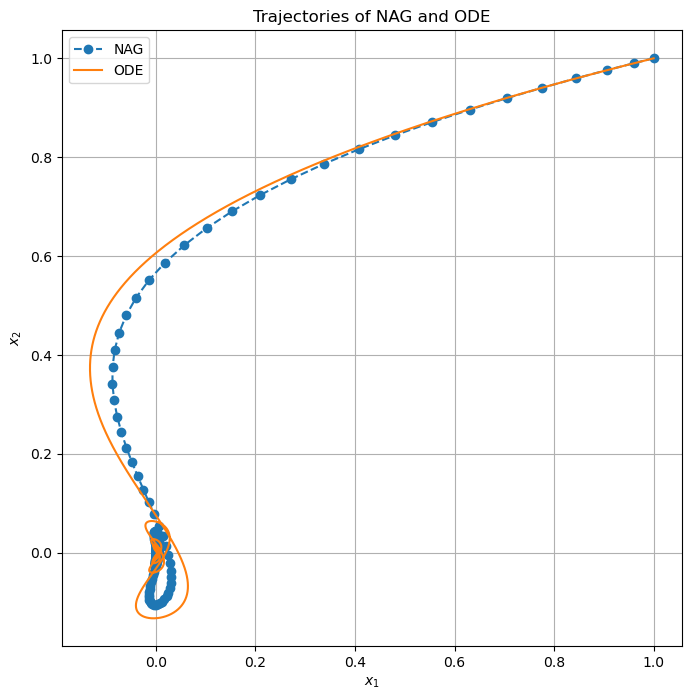

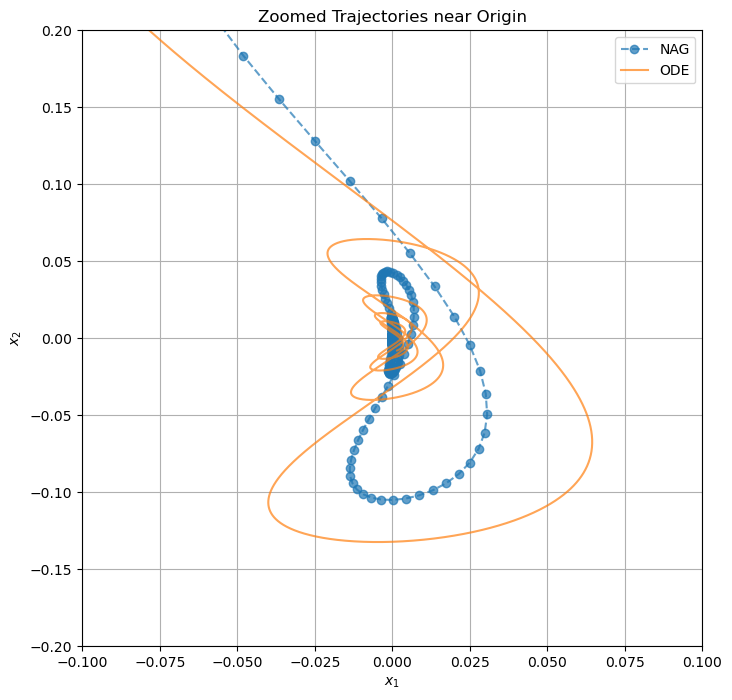

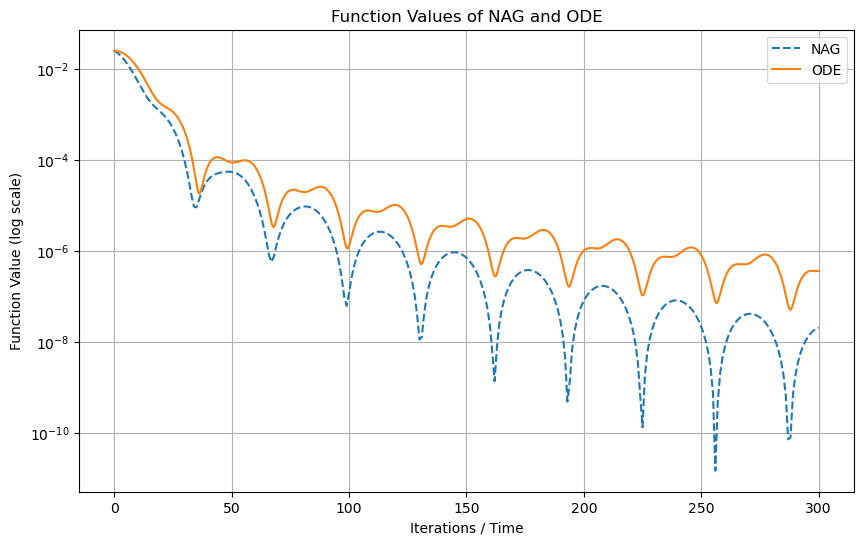

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the convex function and its gradients
def f(x1, x2):
    return 0.02 * x1**2 + 0.005 * x2**2  # Updated function

def grad1(x1):
    return 0.04 * x1  # Updated gradient

def grad2(x2):
    return 0.01 * x2  # Updated gradient

# Define the ODE system
def ode_system(p, t):
    x1, x2, dx1, dx2 = p
    eps = 1e-12  # Stabilization for division
    dpdt = [
        dx1, 
        dx2, 
        -3 * dx1 / (t + eps) - grad1(x1), 
        -3 * dx2 / (t + eps) - grad2(x2)
    ]
    return dpdt

# Define Nesterov's Accelerated Gradient (NAG)
def nag_convex(lr, iterations, x_init):
    x = np.array(x_init)
    v = np.zeros_like(x)
    traj = [x.copy()]
    for k in range(1, iterations + 1):
        beta = k / (k + 3)
        y = x + beta * v
        v = beta * v - lr * np.array([grad1(y[0]), grad2(y[1])])
        x += v
        traj.append(x.copy())
    return np.array(traj)

# Parameters
x_init = [1.0, 1.0]  # Start at (1,1)
p0 = [1.0, 1.0, 0.0, 0.0]  # Initial conditions for ODE: [x1, x2, dx1, dx2]
t2 = np.linspace(1e-5, 300, 10000)  # Time steps for ODE
lr, iterations = 1.0, 300  # Learning rate and iterations for NAG

# Solve ODE
sol_ode = odeint(ode_system, p0, t2)
x1_ode, x2_ode = sol_ode[:, 0], sol_ode[:, 1]

# Solve NAG
traj_nag = nag_convex(lr, iterations, x_init)
x1_nag, x2_nag = traj_nag[:, 0], traj_nag[:, 1]

# Plot trajectories
plt.figure(figsize=(8, 8))
plt.plot(x1_nag, x2_nag, label="NAG", marker="o", linestyle="--")
plt.plot(x1_ode, x2_ode, label="ODE", linestyle="-")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("Trajectories of NAG and ODE")
plt.grid()
plt.show()

# Plot zoomed trajectories focusing near origin
plt.figure(figsize=(8, 8))
zoom_x_range = (-0.1, 0.1)  # X-axis zoom range
zoom_y_range = (-0.2, 0.2)  # Y-axis zoom range
plt.plot(x1_nag, x2_nag, label="NAG", marker="o", linestyle="--", alpha=0.7)
plt.plot(x1_ode, x2_ode, label="ODE", linestyle="-", alpha=0.7)
plt.xlim(zoom_x_range)
plt.ylim(zoom_y_range)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("Zoomed Trajectories near Origin")
plt.grid()
plt.show()

# Plot function values with log-scale
f_ode = [f(x1, x2) for x1, x2 in zip(x1_ode, x2_ode)]
f_nag = [f(x1, x2) for x1, x2 in zip(x1_nag, x2_nag)]
plt.figure(figsize=(10, 6))
plt.plot(range(len(f_nag)), f_nag, label="NAG", linestyle="--")
plt.plot(np.linspace(0, iterations, len(f_ode)), f_ode, label="ODE", linestyle="-")
plt.yscale("log")  # Log scale for function values
plt.xlabel("Iterations / Time")
plt.ylabel("Function Value (log scale)")
plt.legend()
plt.title("Function Values of NAG and ODE")
plt.grid()
plt.show()
